In [3]:

# JUST to print predictions and ground truth 0/1 sequences, need to uncomment 3 lines in utils.py





###########################################################
import numpy as np
random_seed = 37
np.random.seed(random_seed)
from tensorflow import set_random_seed
set_random_seed(random_seed)
###########################################################

from keras.models import Sequential, load_model
# from keras_tqdm import TQDMNotebookCallback
from utils import load_train_history, save_train_history, plot_loss_history, arch_to_str, evaluate_custom_metrics
from collections import defaultdict

FOLD 0
	Min train loss: 0.1486616590460991 @epoch 14
	Min valid loss: 0.20742101897353415 @epoch 4


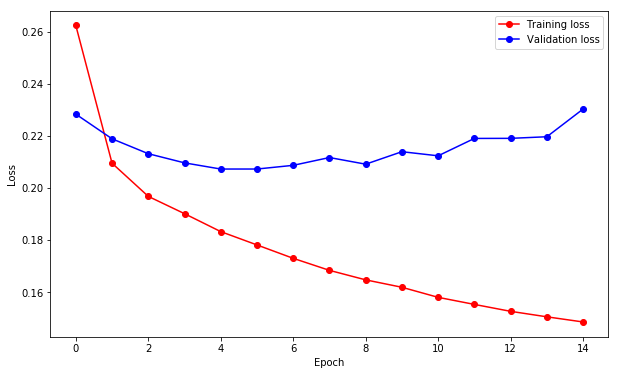

FOLD 1
	Min train loss: 0.1461932921254914 @epoch 14
	Min valid loss: 0.18665217544784282 @epoch 4


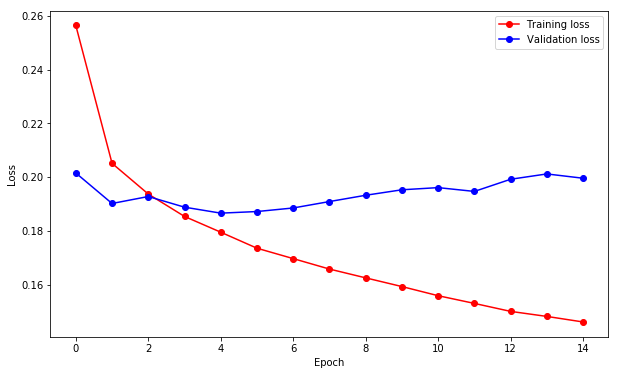

FOLD 2
	Min train loss: 0.14994752417780366 @epoch 12
	Min valid loss: 0.2218494608810508 @epoch 2


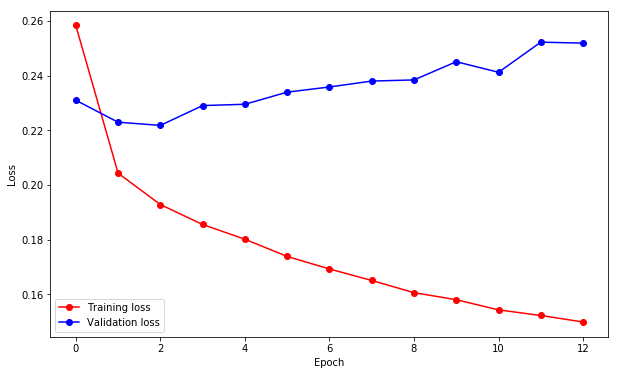

FOLD 3


KeyboardInterrupt: 

In [22]:
#######################################################################################################
# Validation set results (plot training curves from each fold)

from utils import load_train_history, plot_loss_history

n_folds = 45
WINDOW_SIZE = 32
N_FEATURES = 12
GRU_ARCH = [32, 32]
dataset_type = f'{WINDOW_SIZE}ws_{N_FEATURES}f'
model_type = f'{arch_to_str(GRU_ARCH)}u_{dataset_type}'

path_prefix = f'/media/DataDrive/vra1_results_by_fold/'

for k in range(n_folds):
    print(f'FOLD {k}')
    with open(f'{path_prefix}{k}fold_{model_type}/{k}fold_{model_type}.pkl', 'rb') as pickle_filehandler:
        h = pickle.load(pickle_filehandler)
        plot_loss_history(h)

In [2]:
#######################################################################################################
# Validation set results (evaluating the best model from each epoch)

n_folds = 45
window_size_range = [16, 32, 64]
n_features_range = [6, 12]
gru_arch_range = [
    [64], [128], 
    [32, 32], [64, 64], [128, 128]
]

metrics_names = ['bacc', #'f1', 'precision', 'recall'
                ]
voting_strategies = ['last', 'majority']

# 2D arrays for visualizations: taking 12 features and 'last' voting strategy only
loss_grid = np.empty((len(gru_arch_range), len(window_size_range)))
bacc_grid = np.empty((len(gru_arch_range), len(window_size_range)))

for i, GRU_ARCH in enumerate(gru_arch_range):
    for j, WINDOW_SIZE in enumerate(window_size_range):
        for N_FEATURES in n_features_range:            
            dataset_type = f'{WINDOW_SIZE}ws_{N_FEATURES}f'
            model_type = f'{n_folds}fold_{arch_to_str(GRU_ARCH)}u_{dataset_type}'

            # Load training history
            all_train_hist = load_train_history(f'ALL_{model_type}')
            val_losses = []

            avg_val_results = dict()
            for vs in voting_strategies:
                avg_val_results[vs] = defaultdict(list)        

            for fold_results in all_train_hist: 
                min_val_epoch = np.argmin(fold_results['val_loss'])
                val_losses.append( fold_results['val_loss'][min_val_epoch] )
                for vs in voting_strategies:
                    for mn in metrics_names:
                        avg_val_results[vs][mn].append( fold_results[vs][mn][min_val_epoch] )
                        
            loss_grid[i, j] = np.mean(val_losses)
            print(f'\n\tMean val_loss: \t\t {np.mean(val_losses):.4f} +/- {np.std(val_losses):.4f}\n')
            for vs in voting_strategies:
                for mn in metrics_names:
                    if vs == 'last' and mn == 'bacc':
                        bacc_grid[i, j] = np.mean(avg_val_results[vs][mn])
                    print(f'\t[{vs}] Mean {mn}: \t\t {np.mean(avg_val_results[vs][mn]):.4f} +/- {np.std(avg_val_results[vs][mn]):.4f}')
                print()


ALL_45fold_64u_16ws_6f

	Mean val_loss: 		 0.2230 +/- 0.0260

	[last] Mean bacc: 		 0.7928 +/- 0.0251

	[majority] Mean bacc: 		 0.7629 +/- 0.0262

ALL_45fold_64u_16ws_12f

	Mean val_loss: 		 0.2186 +/- 0.0218

	[last] Mean bacc: 		 0.8015 +/- 0.0272

	[majority] Mean bacc: 		 0.7787 +/- 0.0263

ALL_45fold_64u_32ws_6f

	Mean val_loss: 		 0.2143 +/- 0.0210

	[last] Mean bacc: 		 0.7956 +/- 0.0234

	[majority] Mean bacc: 		 0.7807 +/- 0.0232

ALL_45fold_64u_32ws_12f

	Mean val_loss: 		 0.2131 +/- 0.0246

	[last] Mean bacc: 		 0.7991 +/- 0.0253

	[majority] Mean bacc: 		 0.7862 +/- 0.0267

ALL_45fold_64u_64ws_6f

	Mean val_loss: 		 0.2102 +/- 0.0280

	[last] Mean bacc: 		 0.7933 +/- 0.0305

	[majority] Mean bacc: 		 0.7889 +/- 0.0289

ALL_45fold_64u_64ws_12f

	Mean val_loss: 		 0.2008 +/- 0.0204

	[last] Mean bacc: 		 0.8013 +/- 0.0254

	[majority] Mean bacc: 		 0.7977 +/- 0.0253

ALL_45fold_128u_16ws_6f

	Mean val_loss: 		 0.2255 +/- 0.0263

	[last] Mean bacc: 		 0.7912 +/- 0.0237

	[maj

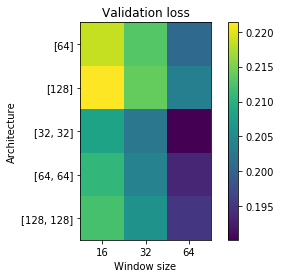

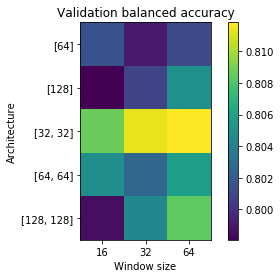

In [3]:
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(loss_grid)
plt.colorbar()
plt.yticks(np.arange(len(gru_arch_range)), gru_arch_range)
plt.ylabel('Architecture')
plt.xticks(np.arange(len(window_size_range)), window_size_range)
plt.xlabel('Window size')
plt.title('Validation loss')
plt.show()

plt.figure()
plt.imshow(bacc_grid)
plt.colorbar()
plt.yticks(np.arange(len(gru_arch_range)), gru_arch_range)
plt.ylabel('Architecture')
plt.xticks(np.arange(len(window_size_range)), window_size_range)
plt.xlabel('Window size')
plt.title('Validation balanced accuracy')
plt.show()

In [4]:
#######################################################################################################
# Evaluate the best models on test set, for each fold

from keras import backend as K
from keras.models import load_model
import glob
import time
import pickle

n_folds = 45
window_size_range = [32]
n_features_range = [12]
gru_arch_range = [
    [64], 
    #[128], 
    #[32, 32], [64, 64], [128, 128]
]

metrics_names = ['bacc', 'f1', 'precision', 'recall']
voting_strategies = ['last', 'majority']

dataset_path_prefix = f'/media/DataDrive/datasets/vra1/subject_independent/'

# 2D arrays for visualizations: taking 6 and 12 features and 'last' and 'majority' voting strategies
test_bacc_grid = dict()
for N_FEATURES in n_features_range:
    test_bacc_grid[N_FEATURES] = dict()
    for vs in voting_strategies:
        test_bacc_grid[N_FEATURES][vs] = np.empty((len(gru_arch_range), len(window_size_range)))
params_grid = np.empty((len(gru_arch_range), len(window_size_range)))

start_time = time.time() 
for i, GRU_ARCH in enumerate(gru_arch_range):
    for j, WINDOW_SIZE in enumerate(window_size_range):
        for N_FEATURES in n_features_range:            
            dataset_type = f'{WINDOW_SIZE}ws_{N_FEATURES}f'
            model_type = f'{n_folds}fold_{arch_to_str(GRU_ARCH)}u_{dataset_type}'
            
#             if model_type in [
#                 '45fold_64u_16ws_6f', '45fold_64u_16ws_12f', '45fold_64u_32ws_6f', '45fold_64u_32ws_12f', '45fold_64u_64ws_6f', '45fold_64u_64ws_12f', 
#                 '45fold_128u_16ws_6f'
#             ]:
#                 continue

            avg_test_results = dict()
            for vs in voting_strategies:
                avg_test_results[vs] = defaultdict(list)  

            for k in range(n_folds):
                
                # Load testing data
#                 local_start_time = time.time() 
                data = np.load(dataset_path_prefix + f'{dataset_type}/{k}fold_{dataset_type}.npz')
                X_test,  Y_test  = data['X_test'],  data['Y_test']
#                 print(f'\t\t Time to load data: {time.time() - local_start_time} s')
                
                # Load best model for this fold: latest model saved is the best one
#                 local_start_time = time.time() 
                K.clear_session()
                best_model_path = sorted(glob.glob(f'/media/DataDrive/vra1_results_by_fold/{k}fold_{arch_to_str(GRU_ARCH)}u_{dataset_type}/*.hdf5'))[-1]
                best_model = load_model(best_model_path)
#                 print(f'\t\t Time to load model: {time.time() - local_start_time} s')

#                 print(f'FOLD {k}: \n\t loading model {best_model_path}\n')    
#                 local_start_time = time.time() 
                test_metrics = evaluate_custom_metrics(Y_true=Y_test, 
                                                       Y_pred=best_model.predict_classes(X_test, batch_size=len(X_test)), 
                                                       chunk_lens=data['test_len'], window_size=WINDOW_SIZE)
#                 print(f'\t\t Time to calculate test metrics: {time.time() - local_start_time} s')
                for vs in voting_strategies:
                    for mn in metrics_names:
                        avg_test_results[vs][mn].append( test_metrics[vs][mn] )
#                         print(f'\t[{vs}] {mn}: \t\t {test_metrics[vs][mn]:.4f}')
#                     print()
#             print()        
                # Free-up the space!
#                 del X_test
#                 del Y_test
#                 del best_model
                break
    
#             print(f'{model_type} \t #params: {best_model.count_params()}')
#             params_grid[i, j] = best_model.count_params()
            
#             for vs in voting_strategies:
#                 for mn in metrics_names:
#                     if mn == 'bacc':
#                         test_bacc_grid[N_FEATURES][vs][i, j] = np.mean(avg_test_results[vs][mn])
#                     print(f'\t[{vs}] Mean {mn}: \t\t {np.mean(avg_test_results[vs][mn]):.4f} +/- {np.std(avg_test_results[vs][mn]):.4f}')
#                 print()
                
#             # Save test results (from all folds)
#             with open(f'./test_results/test_results_{model_type}.pkl', 'wb') as pickle_filehandler:
#                 pickle.dump(avg_test_results, pickle_filehandler)
            
#             print(f'\t\t Total time taken: {time.time() - start_time} s\n')

Instructions for updating:
Colocations handled automatically by placer.
Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.
Instructions for updating:
Use tf.cast instead.
[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

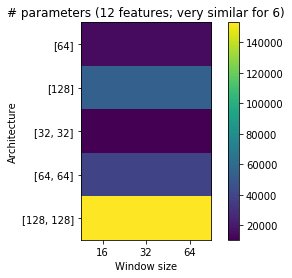

[[ 14849.  14849.  14849.]
 [ 54273.  54273.  54273.]
 [ 10593.  10593.  10593.]
 [ 39617.  39617.  39617.]
 [152961. 152961. 152961.]]


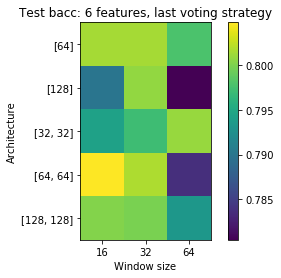

[[0.8015151  0.80149141 0.79787348]
 [0.78990443 0.80079909 0.78049224]
 [0.79433784 0.79719375 0.80102207]
 [0.80476372 0.80180645 0.78371651]
 [0.80026774 0.7999283  0.79329484]]


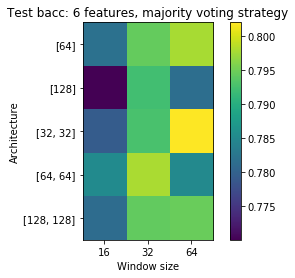

[[0.78189936 0.79444863 0.79778829]
 [0.77001349 0.7923294  0.78158845]
 [0.77929074 0.7928397  0.80198182]
 [0.78536226 0.79792022 0.78502877]
 [0.78125827 0.79426825 0.79471137]]


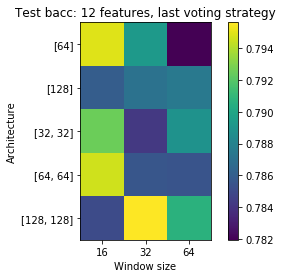

[[0.79492874 0.78932909 0.78196352]
 [0.78597125 0.78711597 0.78749614]
 [0.79254314 0.78424836 0.78893152]
 [0.79461921 0.78560635 0.785498  ]
 [0.78506935 0.79560204 0.79069608]]


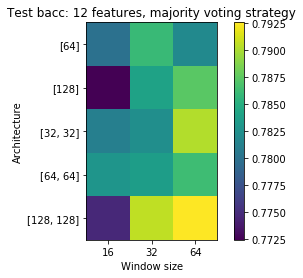

[[0.77993502 0.78608543 0.78197091]
 [0.77246642 0.78406924 0.78739608]
 [0.78110271 0.78237036 0.79022568]
 [0.78295309 0.78361442 0.78633134]
 [0.77474806 0.79066182 0.79254874]]


In [7]:
# Show heat maps 5?
from matplotlib import pyplot as plt

plt.figure()
plt.imshow(params_grid)
plt.colorbar()
plt.yticks(np.arange(len(gru_arch_range)), gru_arch_range)
plt.ylabel('Architecture')
plt.xticks(np.arange(len(window_size_range)), window_size_range)
plt.xlabel('Window size')
plt.title('# parameters (12 features; very similar for 6)')
plt.show()
print(params_grid)

for N_FEATURES in n_features_range:
    for vs in voting_strategies:
        plt.figure()
        plt.imshow(test_bacc_grid[N_FEATURES][vs])
        plt.colorbar()
        plt.yticks(np.arange(len(gru_arch_range)), gru_arch_range)
        plt.ylabel('Architecture')
        plt.xticks(np.arange(len(window_size_range)), window_size_range)
        plt.xlabel('Window size')
        plt.title(f'Test bacc: {N_FEATURES} features, {vs} voting strategy')
        plt.show()
        print(test_bacc_grid[N_FEATURES][vs])


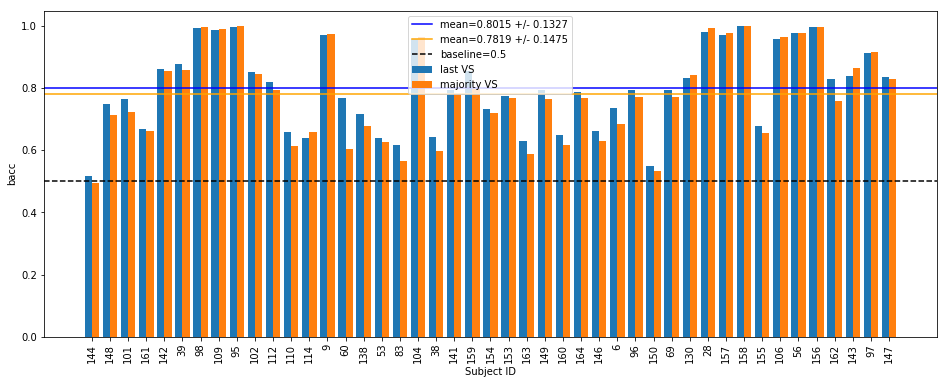

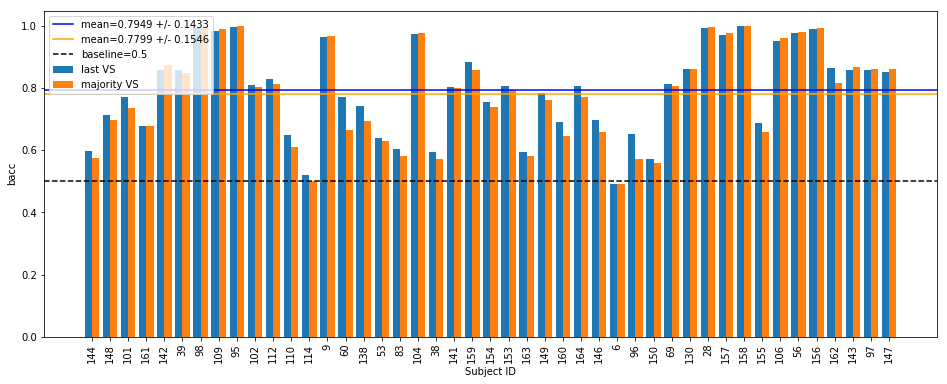

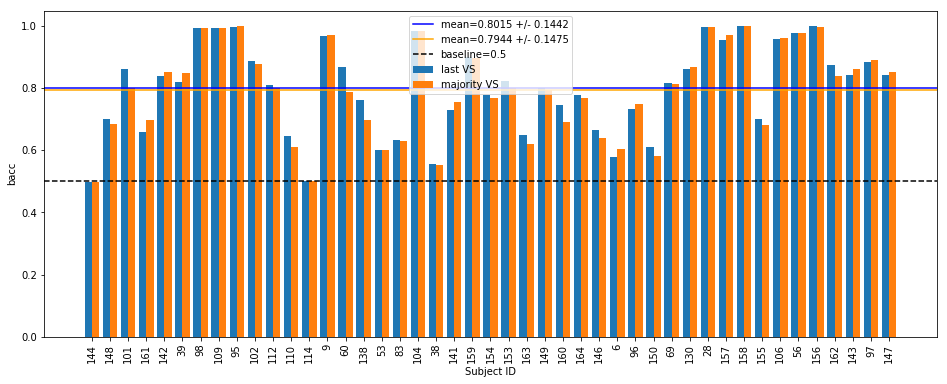

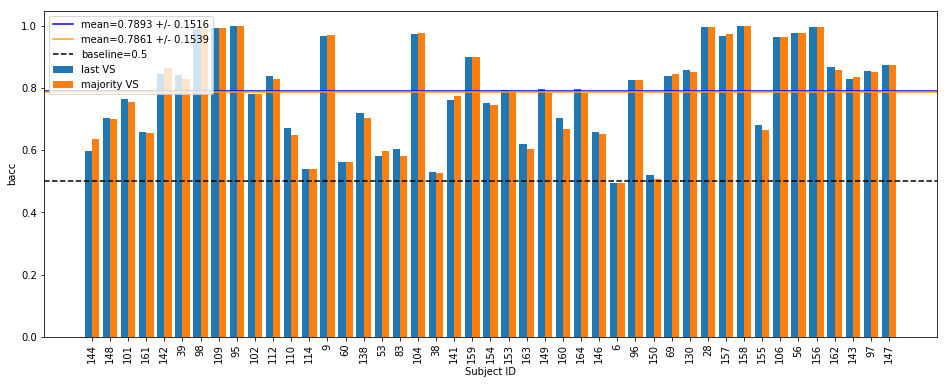

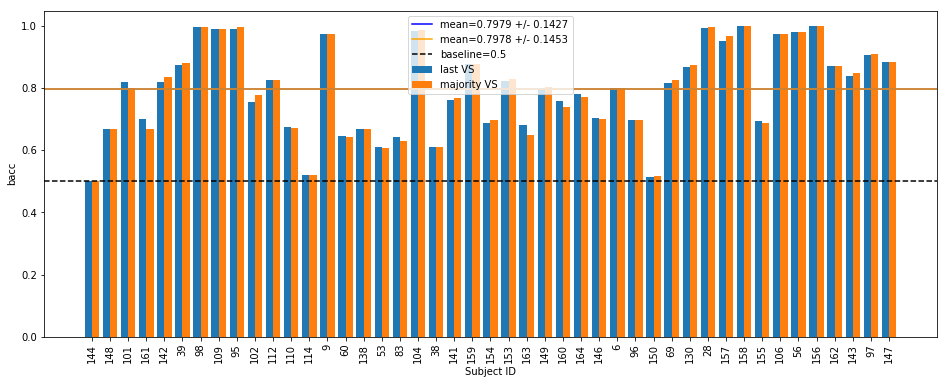

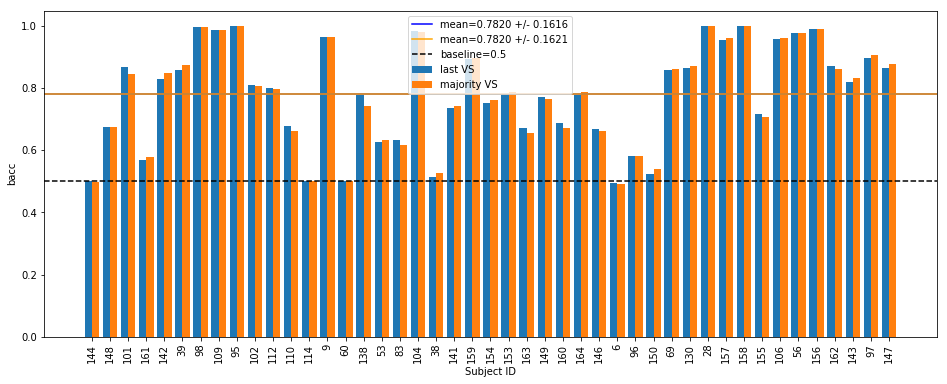

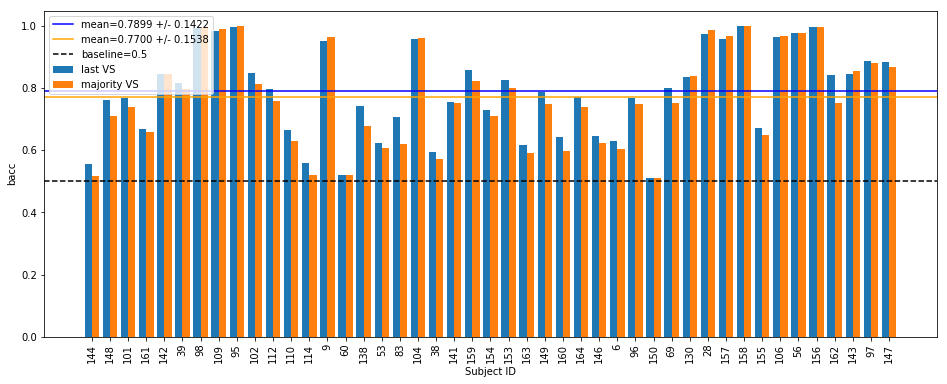

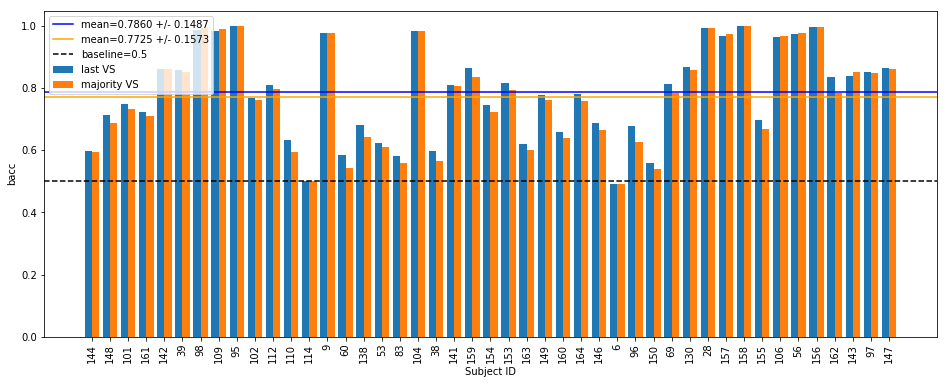

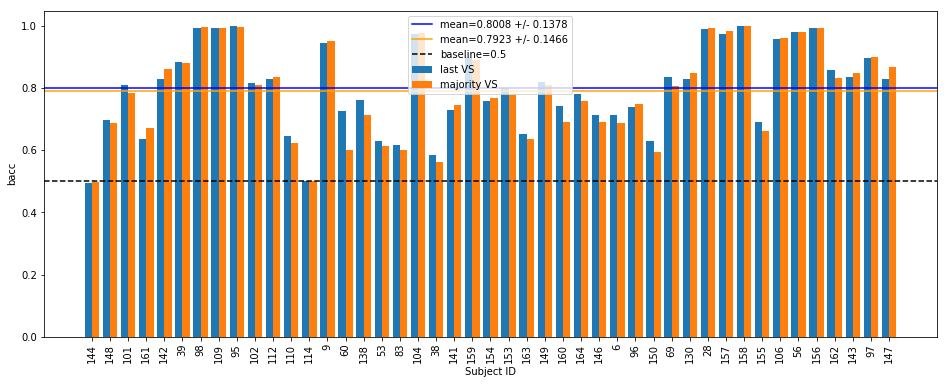

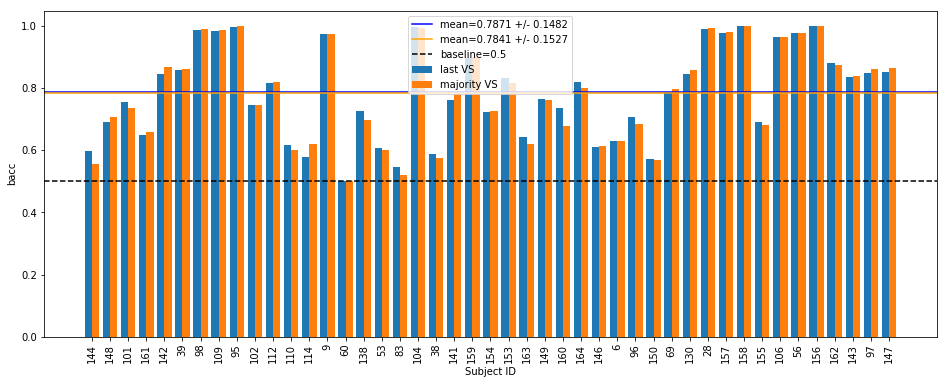

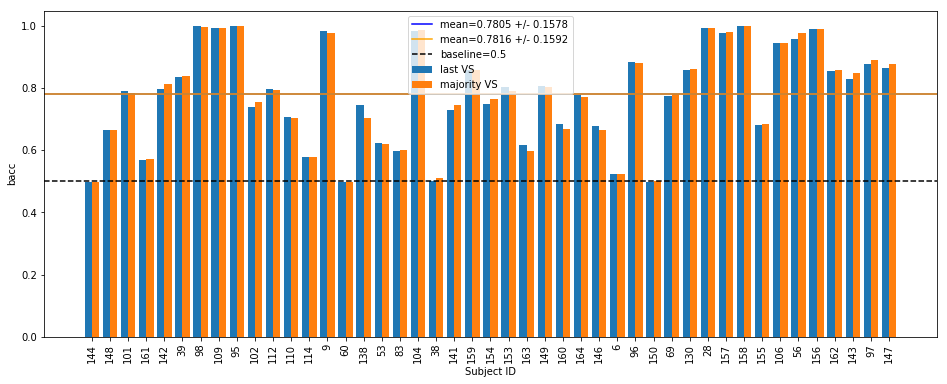

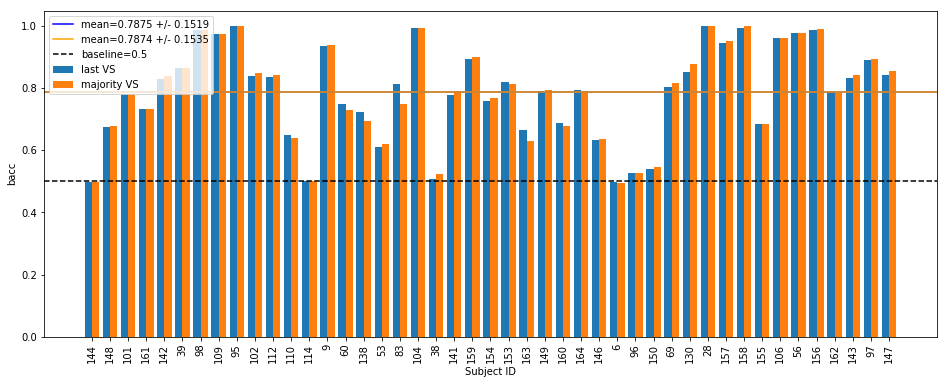

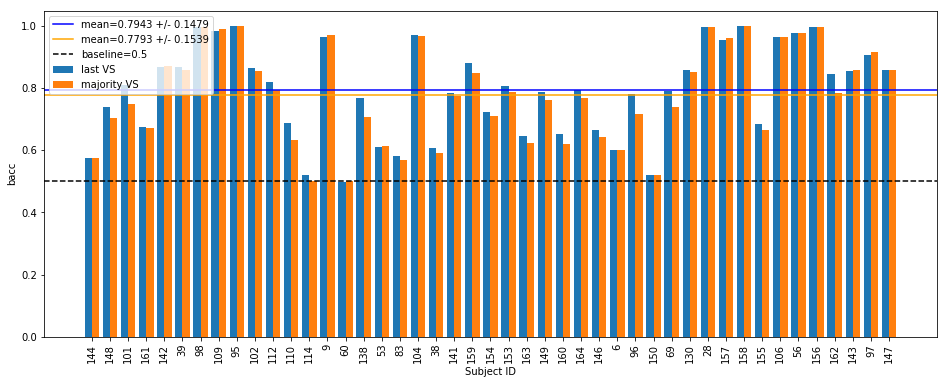

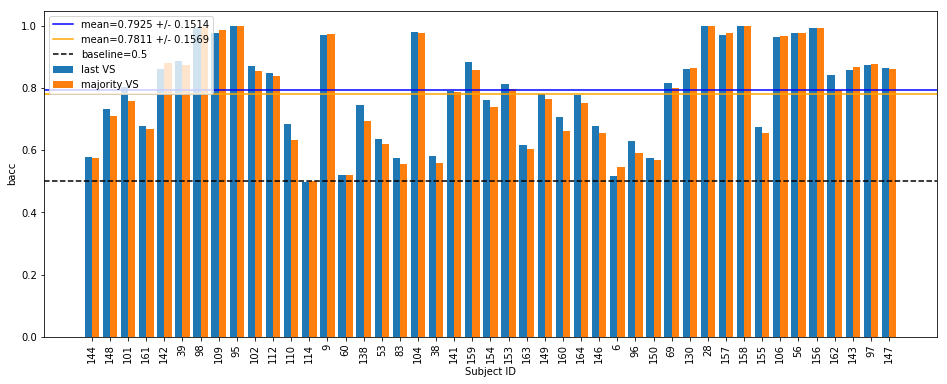

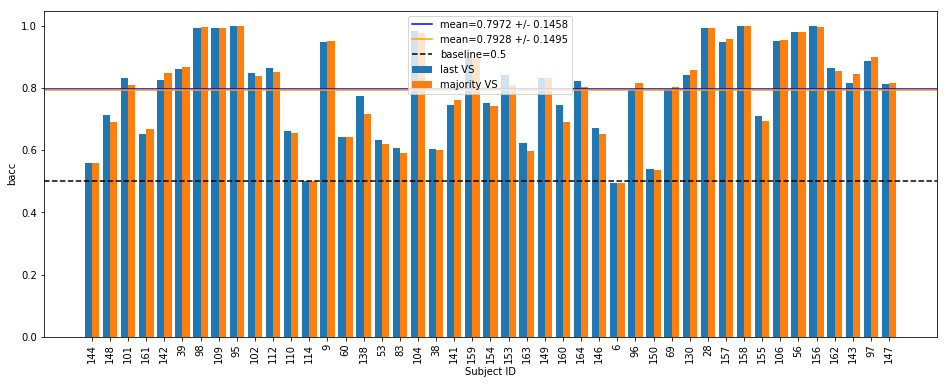

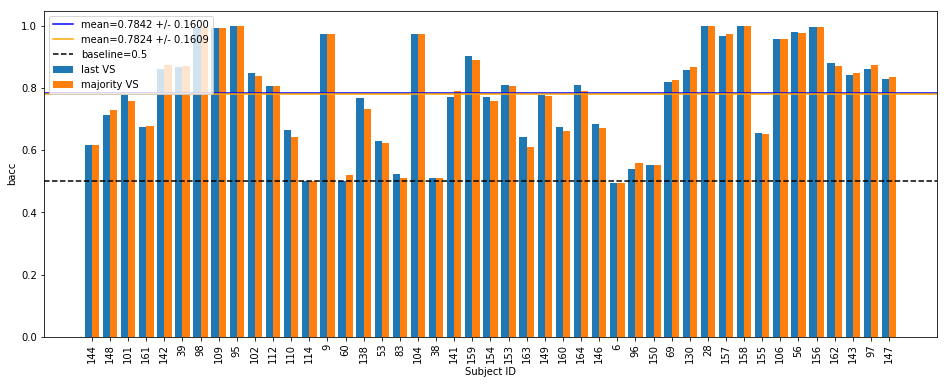

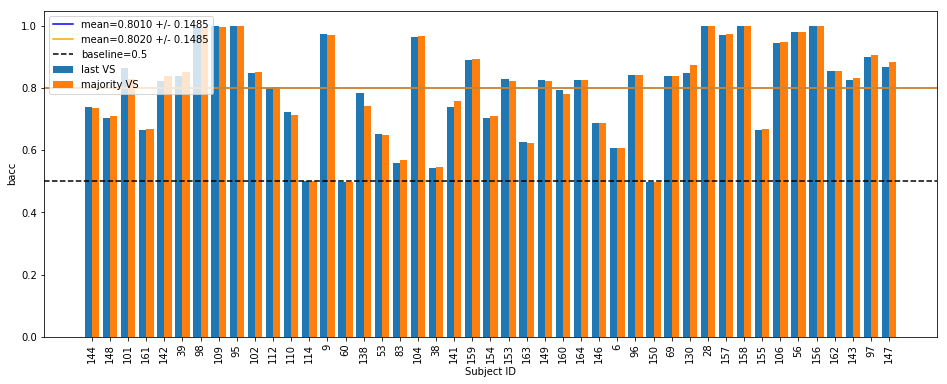

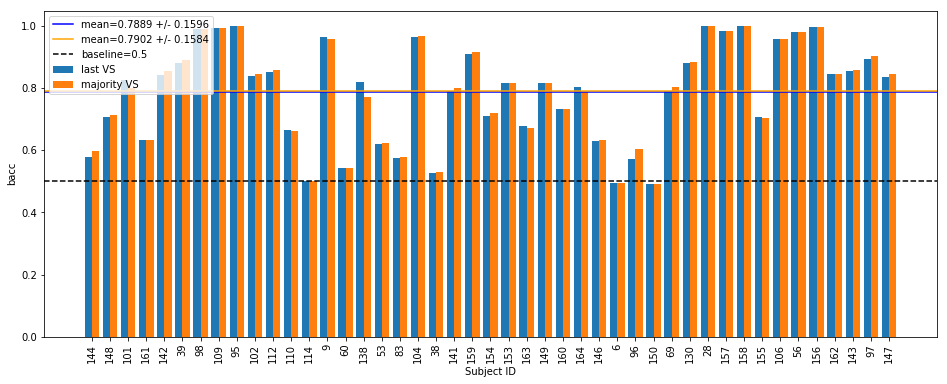

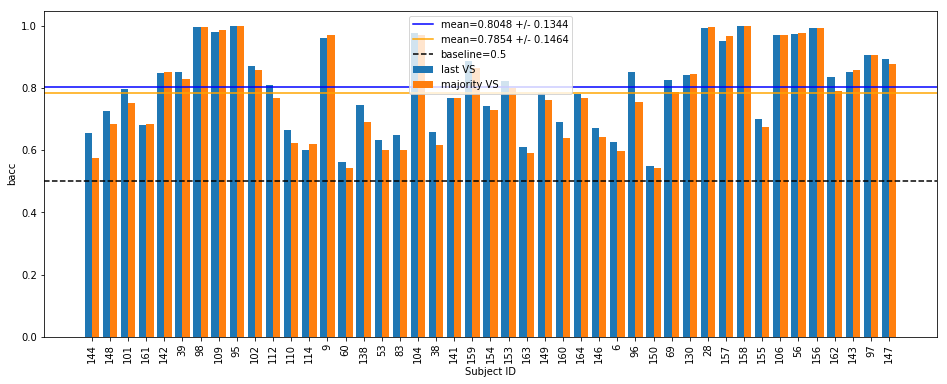

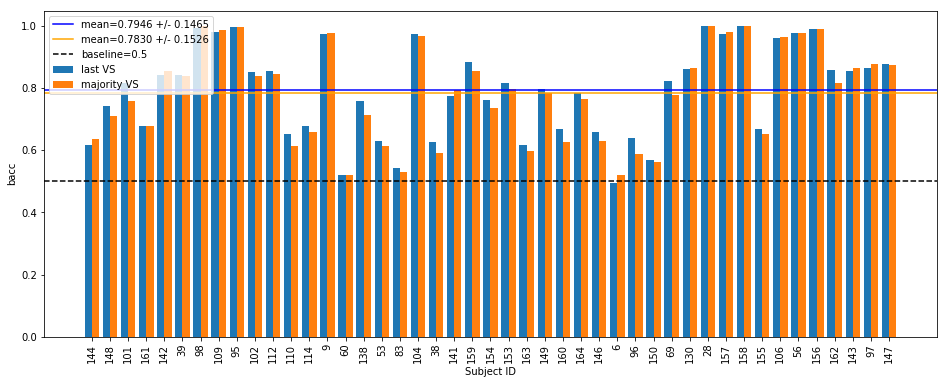

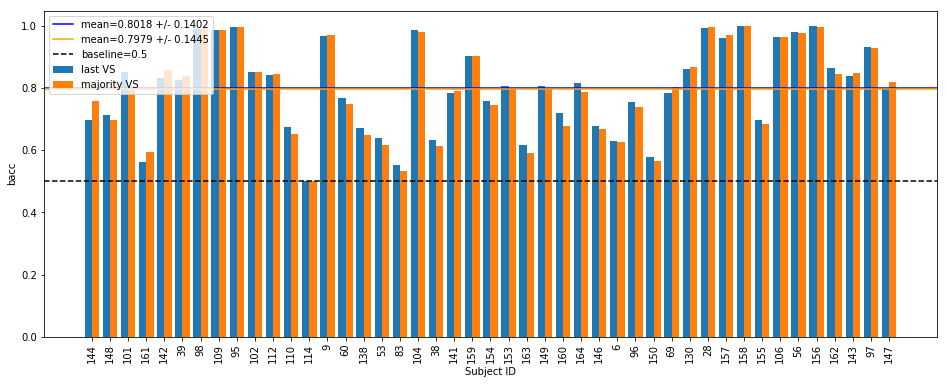

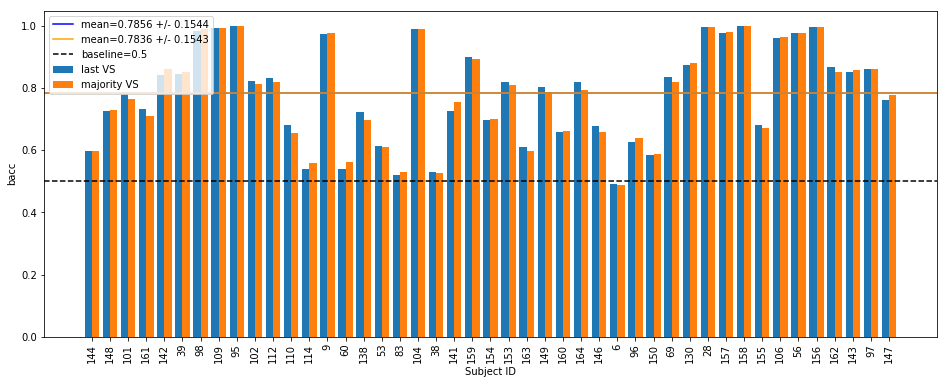

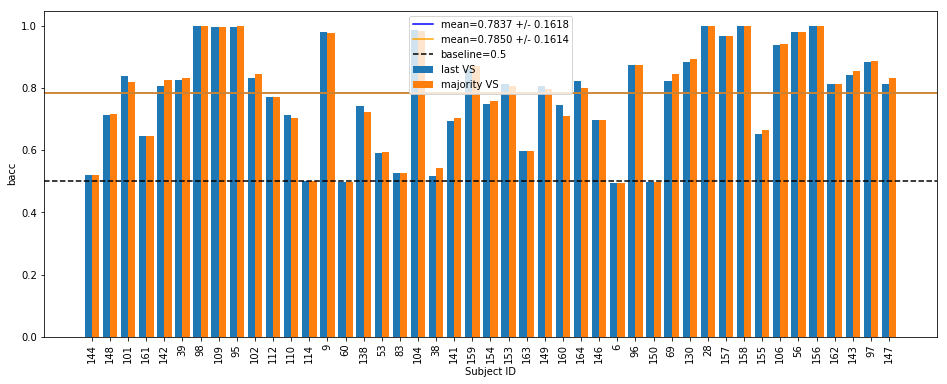

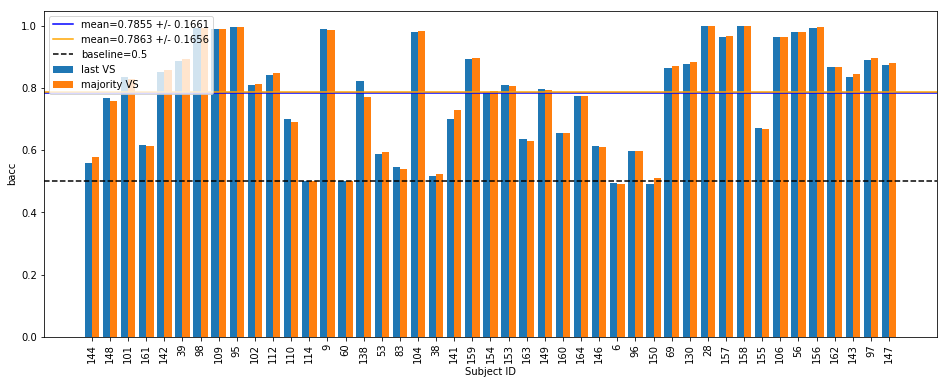

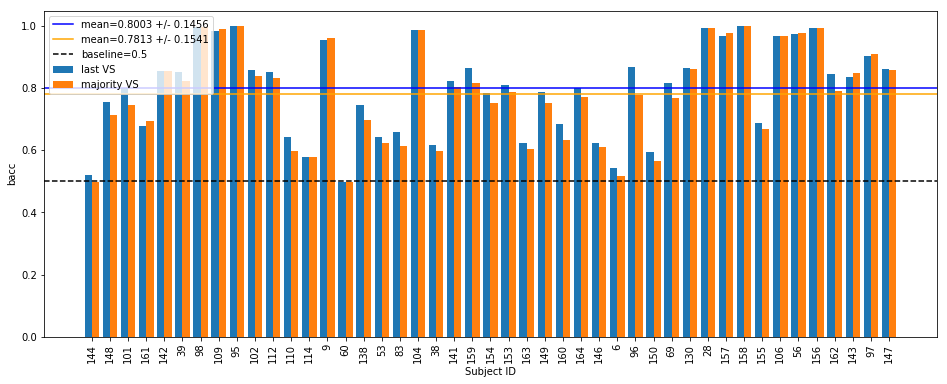

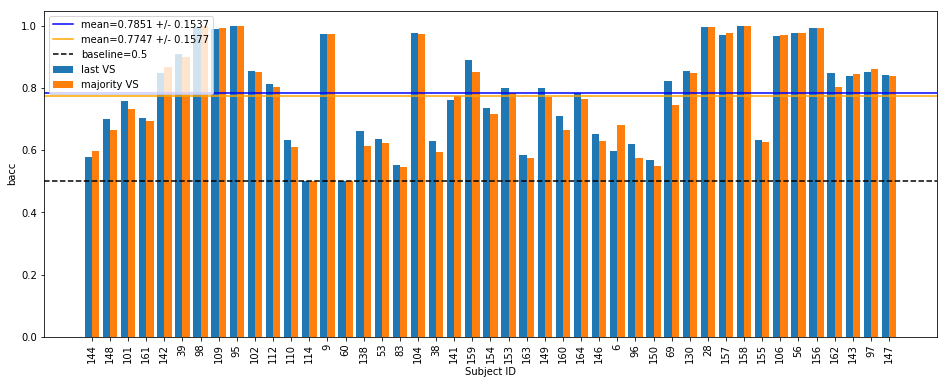

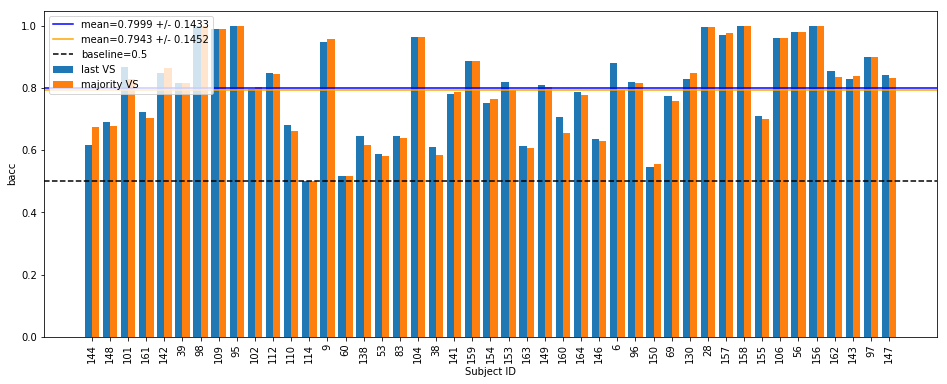

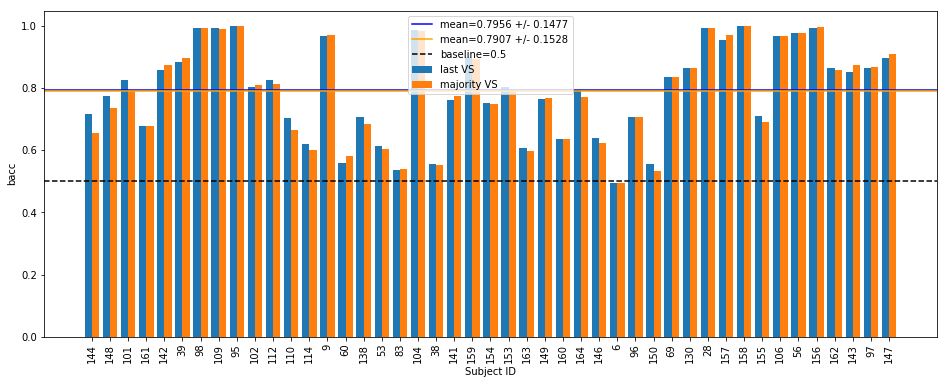

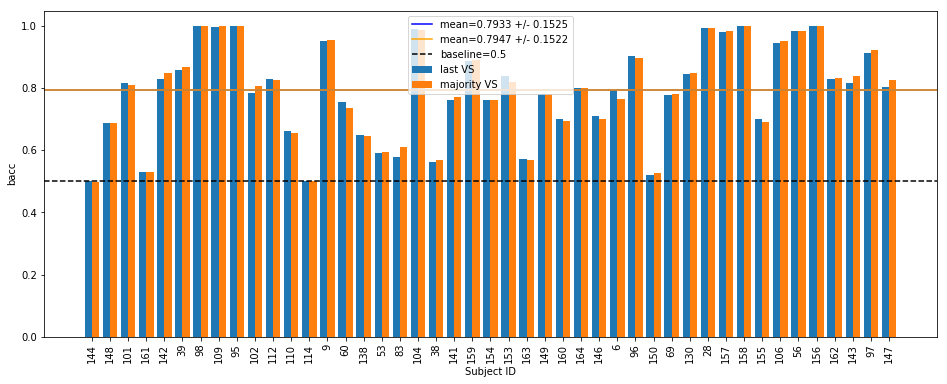

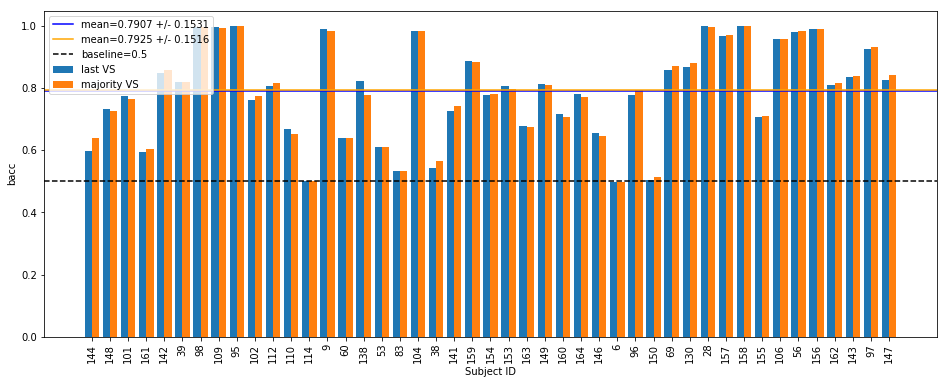

In [6]:
# Plot test results by subject

from matplotlib import pyplot as plt
from utils import arch_to_str
import pickle
import numpy as np

n_folds = 45
dataset_split_filename = f'/home/ICT2000/jondras/datasets/vra1/subject_independent/dataset_split_{n_folds}fold.npz'

window_size_range = [16, 32, 64]
n_features_range = [6, 12]
gru_arch_range = [
    [64], [128], 
    [32, 32], [64, 64], [128, 128]
]

def plot_test_results_by_subject(data, metric_name):
    
    x_ticks = [np.load(dataset_split_filename)[f'{k}_test'][0].split('/')[-1].split('.')[0][3:] for k in range(n_folds)]
    x_axis = np.arange(len(x_ticks))    
    
    plt.figure(figsize=[16,6])
    w = 0.4
    plt.bar(x_axis - w/2, data['last'][metric_name], align='center', width=w, 
            label=f"last VS")
#             label=f"last VS: {np.mean(data['last'][metric_name])} +/- {np.std(data['last'][metric_name])}")
    plt.bar(x_axis + w/2, data['majority'][metric_name], align='center', width=w, 
            label=f"majority VS")
#             label=f"majority VS: {np.mean(data['majority'][metric_name])} +/- {np.std(data['majority'][metric_name])}")
    plt.axhline(y=np.mean(data['last'][metric_name]), c='blue', label=f'mean={np.mean(data["last"][metric_name]):.4f} +/- {np.std(data["last"][metric_name]):.4f}')
    plt.axhline(y=np.mean(data['majority'][metric_name]), c='orange', label=f'mean={np.mean(data["majority"][metric_name]):.4f} +/- {np.std(data["majority"][metric_name]):.4f}')
    plt.axhline(y=0.5, c='k', linestyle='--', label='baseline=0.5')
    plt.xticks(x_axis, x_ticks, rotation=90)
    plt.xlabel('Subject ID')#,fontsize=16)
    plt.ylabel(metric_name)#,fontsize=16)
    # plt.ylim(0.35, 0.95)
    # plt.title('Loss Curves',fontsize=16)
    plt.legend()
    plt.show()

# for vs in voting_strategies:
#     for mn in metrics_names:
#         avg_test_results[vs][mn].append( test_metrics[vs][mn] )
        
for i, GRU_ARCH in enumerate(gru_arch_range):
    for j, WINDOW_SIZE in enumerate(window_size_range):
        for N_FEATURES in n_features_range:            
            dataset_type = f'{WINDOW_SIZE}ws_{N_FEATURES}f'
            model_type = f'{n_folds}fold_{arch_to_str(GRU_ARCH)}u_{dataset_type}'
            
# model_type = '45fold_64u_16ws_6f'
            with open(f'./test_results/test_results_{model_type}.pkl', 'rb') as pickle_filehandler:
                plot_test_results_by_subject(data=pickle.load(pickle_filehandler), metric_name='bacc')        


In [14]:
import tensorflow as tf
import keras as K
tf.keras.callbacks.EarlyStopping, K.callbacks.EarlyStopping, tf.keras.layers.CuDNNGRU, K.layers.CuDNNGRU
tf.keras.models.save_model, K.models.save_model

(<function tensorflow.python.keras.engine.saving.save_model(model, filepath, overwrite=True, include_optimizer=True)>,
 <function keras.engine.saving.save_model(model, filepath, overwrite=True, include_optimizer=True)>)